In [45]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import korean

In [46]:
# <과제 1>
# 서울시 인구 분포와 서울시 CCTV 설치 현황(갯수)데이터를 가지고 데이터 분석 및 시각화하셔요.
# - 서울시 각 구별 cctv 수를 파악하고 인구대비 cctv 비율을 구해 순위 비교
# - 인구대비 cctv의 평균치를 확인하고 cctv가 과하게 부족한 구를 확인
# - 고령자 대비 cctv 비율
# - 외국인 대비 cctv 비율

# <과제 2>
# 지방자치단체에서 인/허가한 업종별 데이터를 가지고 데이터 분석 및 시각화하셔요
# - 서울시 서대문구에서 치킨집이 가장 많은 동은?
# - 서울시 구별 치킨집 현황(갯수) 등

In [47]:
cctv_result_data = pd.read_csv('./data/cctv_result.csv')
cctv_result_data

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321
5,광진구,878,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.235917
6,구로구,1884,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.420654
7,금천구,1348,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.528458
8,노원구,1566,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.275034
9,도봉구,825,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.236630


In [48]:
# --- cctv 수 컬럼 추가 ---

cctv_result_data['CCTV수'] = (cctv_result_data['CCTV비율'] / 100) * cctv_result_data['인구수']
cctv_result_data

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,CCTV수
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,3238.0
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843,1010.0
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672,831.0
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,911.0
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321,2109.0
5,광진구,878,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.235917,878.0
6,구로구,1884,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.420654,1884.0
7,금천구,1348,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.528458,1348.0
8,노원구,1566,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.275034,1566.0
9,도봉구,825,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.236630,825.0


In [49]:
# --- 인구대비 CCTV 비율(1000명당) 컬럼 추가 ---

cctv_result_data['인구대비 CCTV비율'] = cctv_result_data['CCTV비율'] * 10
cctv_result_data

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,CCTV수,인구대비 CCTV비율
0,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,3238.0,5.675723
1,강동구,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843,1010.0,2.228434
2,강북구,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672,831.0,2.516718
3,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885,911.0,1.508848
4,관악구,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321,2109.0,4.013206
5,광진구,878,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,0.235917,878.0,2.359175
6,구로구,1884,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506,0.420654,1884.0,4.206540
7,금천구,1348,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.528458,1348.0,5.284575
8,노원구,1566,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.275034,1566.0,2.750341
9,도봉구,825,246.638655,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507,0.236630,825.0,2.366297


In [50]:
# --- 인구대비 CCTV 비율 높은 순위 ---

cctv_index_data = cctv_result_data.sort_values(by="인구대비 CCTV비율", ascending=False)
# '인구대비 CCTV비율'을 기준으로 내림차순 정렬
# sort_values()는 기본적으로 원본 DataFrame을 변경하지 않고
# 정렬된 새로운 DataFrame을 반환하므로, 
# 결과를 cctv_index_data라는 새로운 변수에 저장

cctv_index_data.index = range(1, len(cctv_index_data) + 1)
# 정렬 후 인덱스를 1부터 다시 부여
# range의 끝은 포함되지 않기 때문에 +1을 해주어 전체 행 수를 반영함

cctv_index_data

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,CCTV수,인구대비 CCTV비율
1,종로구,1619,248.922414,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,0.994350,1619.0,9.943496
2,용산구,2096,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.858302,2096.0,8.583023
3,중구,1023,147.699758,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,0.767787,1023.0,7.677875
4,강남구,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572,3238.0,5.675723
5,금천구,1348,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255,0.528458,1348.0,5.284575
6,양천구,2482,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.517107,2482.0,5.171070
7,서초구,2297,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.510093,2297.0,5.100930
8,동대문구,1870,74.766355,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322,0.506095,1870.0,5.060948
9,은평구,2108,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019,0.426386,2108.0,4.263858
10,성동구,1327,81.780822,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,0.426354,1327.0,4.263536


In [51]:
# --- 하위 행 확인 ---
cctv_index_data.tail(1)

# 강서구가 제일 낮음을 확인

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,CCTV수,인구대비 CCTV비율
25,강서구,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.08054,12.015794,0.150885,911.0,1.508848


In [52]:
# --- 상위 행 확인 ---
cctv_index_data.head(1)

# 종로구가 제일 높음을 확인

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,CCTV수,인구대비 CCTV비율
1,종로구,1619,248.922414,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,0.99435,1619.0,9.943496


In [53]:
# --- 고령자 대비 cctv 비율 ---

elderly_people_data = cctv_result_data[['구별', '고령자', '고령자비율', 'CCTV수', 'CCTV비율']]
# 새로운 DataFrame을 생성

elderly_people_data['고령자 대비 CCTV비율'] = (elderly_people_data['CCTV수'] / elderly_people_data['고령자']) * 1000
# 고령자 대비 cctv 비율 컬럼 추가

elderly_people_data.sort_values(by="고령자 대비 CCTV비율", ascending=False, inplace=True)
# '고령자 대비 CCTV비율'을 기준으로 내림차순 정렬
# 기본적으로 sort_values()는 새로운 DataFrame을 반환하기 때문에
# inplace=True를 사용하면 elderly_people_data 자체가 정렬된 상태로 변경됨

elderly_people_data.index = range(1, len(elderly_people_data) + 1)
# 정렬 후 인덱스를 1부터 다시 부여
# range의 끝은 포함되지 않기 때문에 +1을 해주어 전체 행 수를 반영함

elderly_people_data

C:\Users\User\AppData\Local\Temp\ipykernel_26720\52101615.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elderly_people_data['고령자 대비 CCTV비율'] = (elderly_people_data['CCTV수'] / elderly_people_data['고령자']) * 1000
C:\Users\User\AppData\Local\Temp\ipykernel_26720\52101615.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elderly_people_data.sort_values(by="고령자 대비 CCTV비율", ascending=False, inplace=True)


,구별,고령자,고령자비율,CCTV수,CCTV비율,고령자 대비 CCTV비율
1,종로구,25425.0,15.615404,1619.0,0.994350,63.677483
2,용산구,36231.0,14.836427,2096.0,0.858302,57.851012
3,강남구,63167.0,11.072217,3238.0,0.567572,51.260943
4,중구,20764.0,15.583909,1023.0,0.767787,49.267964
5,양천구,52975.0,11.036964,2482.0,0.517107,46.852289
6,서초구,51733.0,11.488308,2297.0,0.510093,44.401059
7,금천구,32970.0,12.925255,1348.0,0.528458,40.885654
8,동대문구,54173.0,14.661322,1870.0,0.506095,34.519041
9,성동구,39997.0,12.850689,1327.0,0.426354,33.177488
10,구로구,56833.0,12.689506,1884.0,0.420654,33.149755


In [54]:
# --- 외국인 대비 cctv 비율 ---

foreigner_data = cctv_result_data[['구별', '외국인', '외국인비율', 'CCTV수', 'CCTV비율']]
# 새로운 DataFrame을 생성

foreigner_data['외국인 대비 CCTV비율'] = (foreigner_data['CCTV수'] / foreigner_data['외국인']) * 1000
# 외국인 대비 cctv 비율 컬럼 추가

foreigner_data.sort_values(by="외국인 대비 CCTV비율", ascending=False, inplace=True)
# '외국인 대비 CCTV비율'을 기준으로 내림차순 정렬
# 기본적으로 sort_values()는 새로운 DataFrame을 반환하기 때문에
# inplace=True를 사용하면 elderly_people_data 자체가 정렬된 상태로 변경됨

foreigner_data.index = range(1, len(foreigner_data) + 1)
# 정렬 후 인덱스를 1부터 다시 부여
# range의 끝은 포함되지 않기 때문에 +1을 해주어 전체 행 수를 반영함

foreigner_data

C:\Users\User\AppData\Local\Temp\ipykernel_26720\513552374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreigner_data['외국인 대비 CCTV비율'] = (foreigner_data['CCTV수'] / foreigner_data['외국인']) * 1000
C:\Users\User\AppData\Local\Temp\ipykernel_26720\513552374.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreigner_data.sort_values(by="외국인 대비 CCTV비율", ascending=False, inplace=True)


,구별,외국인,외국인비율,CCTV수,CCTV비율,외국인 대비 CCTV비율
1,강남구,4950.0,0.867660,3238.0,0.567572,654.141414
2,양천구,4029.0,0.839413,2482.0,0.517107,616.033755
3,서초구,4316.0,0.958451,2297.0,0.510093,532.205746
4,은평구,4445.0,0.899091,2108.0,0.426386,474.240720
5,노원구,3819.0,0.670725,1566.0,0.275034,410.054988
6,도봉구,2017.0,0.578524,825.0,0.236630,409.023302
7,강동구,4214.0,0.929765,1010.0,0.222843,239.677266
8,강북구,3506.0,1.061806,831.0,0.251672,237.022248
9,중랑구,4621.0,1.114829,916.0,0.220988,198.225492
10,종로구,9231.0,5.669451,1619.0,0.994350,175.387282


In [55]:
cctv_data = pd.read_csv('./data/cctv_in_Seoul.csv')
cctv_data

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [56]:
# --- CCTV 많은 순위 ---

cctv_data.sort_values(by="소계", ascending=False, inplace=True)
# '소계'를 기준으로 내림차순 정렬
# 기본적으로 sort_values()는 새로운 DataFrame을 반환하기 때문에
# inplace=True를 사용하면 elderly_people_data 자체가 정렬된 상태로 변경됨

cctv_data.index = range(1, len(cctv_data) + 1)
# 정렬 후 인덱스를 1부터 다시 부여
# range의 끝은 포함되지 않기 때문에 +1을 해주어 전체 행 수를 반영함

cctv_data

,기관명,소계,2013년도 이전,2014년,2015년,2016년
1,강남구,3238,1292,430,584,932
2,양천구,2482,1843,142,30,467
3,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
5,은평구,2108,1138,224,278,468
6,용산구,2096,1368,218,112,398
7,구로구,1884,1142,173,246,323
8,동대문구,1870,1070,23,198,579
9,성북구,1651,1009,78,360,204
10,종로구,1619,464,314,211,630


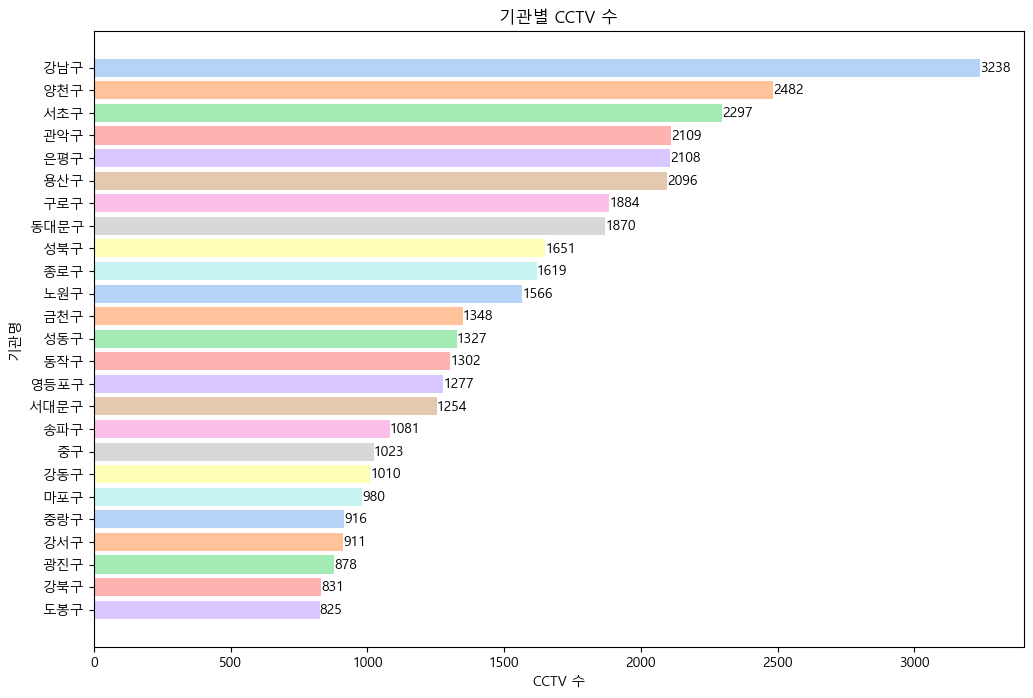

In [57]:
# --- 기관별 CCTV 수 그래프 ---

# 데이터 준비
# x축: CCTV 소계 (막대의 길이)
x = cctv_data['소계']

# y축: 기관명 (각 막대 레이블)
y = cctv_data['기관명']


# 색상 설정 (파스텔톤)
# seaborn의 'pastel' 팔레트를 사용하여 막대별 색상을 지정
palette = sns.color_palette("pastel", len(cctv_data))  # 데이터 개수만큼 색상 생성

# 기관명과 색상을 매핑하여 딕셔너리로 저장
colors = {org: palette[i] for i, org in enumerate(cctv_data['기관명'])}


# 그래프 그리기
plt.figure(figsize=(12,8))  # 그래프 크기 설정 (가로 12, 세로 8)

# 각 기관별로 막대 하나씩 그리기
for i, row in cctv_data.iterrows():
    # row['기관명']: y축 위치 (막대 레이블)
    # row['소계']: x축 값 (막대 길이)
    # color=colors[row['기관명']]: 기관별로 다른 파스텔 색상 적용
    # alpha=0.8: 막대의 투명도를 80%로 설정 (조금 연하게 보이도록)
    plt.barh(row['기관명'], row['소계'], color=colors[row['기관명']], alpha=0.8)


# 막대 위에 CCTV 수치 표시
for i, row in cctv_data.iterrows():
    # row['소계'] + 0.5: 막대 끝보다 약간 오른쪽으로 이동
    # row['기관명']: y축 위치
    # va='center': 텍스트 수직 중앙 정렬
    plt.text(row['소계'] + 0.5, row['기관명'], row['소계'], va='center', fontsize=10)


# 축 레이블과 그래프 제목
plt.xlabel('CCTV 수')     # x축 레이블
plt.ylabel('기관명')         # y축 레이블
plt.title('기관별 CCTV 수')  # 그래프 제목


# y축 순서 반전 (옵션)
# 값이 큰 기관이 위쪽에 오도록 설정
plt.gca().invert_yaxis()


# 그래프 출력
plt.show()

In [58]:
# --- CCTV 가장 많은 구 ---

cctv_data.head(1)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
1,강남구,3238,1292,430,584,932


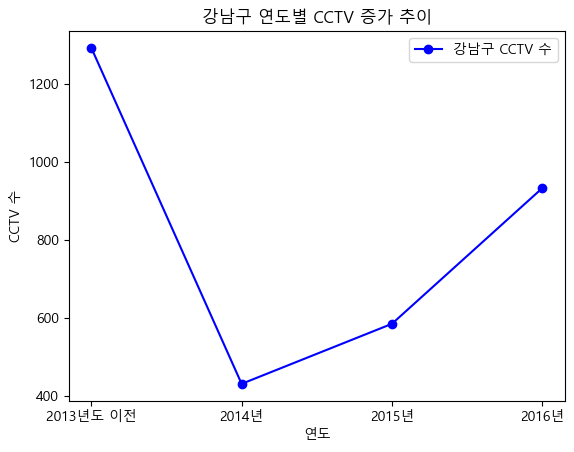

In [59]:
# --- CCTV 가장 많은 강남구의 연도별 증가 그래프 ---

# cctv_data의 첫 번째 행 선택 (강남구 데이터라고 가정)
gangnam = cctv_data.iloc[0]  

# x축: 연도 컬럼
years = ['2013년도 이전', '2014년', '2015년', '2016년']

# y축: 강남구 CCTV 수 (선택한 연도 컬럼 값)
cctv_count = gangnam[years].values  # Series를 NumPy 배열로 변환하여 1차원 형태로 만듦

# --- 선 그래프 그리기 ---
plt.plot(
    years,                # x축 데이터: 연도
    cctv_count,           # y축 데이터: CCTV 수
    marker='o',           # 각 데이터 포인트에 원형 표시
    linestyle='-',        # 데이터를 선으로 연결
    color='blue',      # 선 색상
    label='강남구 CCTV 수' # 범례 텍스트
)

# --- 축 레이블과 그래프 제목 ---
plt.xlabel('연도')        # x축 레이블
plt.ylabel('CCTV 수')     # y축 레이블
plt.title('강남구 연도별 CCTV 증가 추이')  # 그래프 제목

# --- 범례 ---
plt.legend(loc='best')    # 최적 위치에 범례 자동 배치

# --- 그래프 화면 출력 ---
plt.show()

In [60]:
# --- CCTV 가장 적은 구 ---

cctv_data.tail(1)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
25,도봉구,825,238,159,42,386


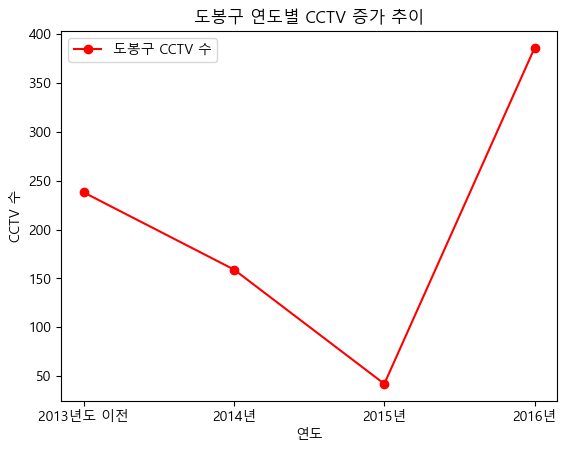

In [61]:
# --- CCTV 가장 적은 도봉구의 연도별 증가 그래프 ---

# cctv_data의 마지막 행 선택 (도봉구 데이터라고 가정)
dobong = cctv_data.iloc[-1]

# x축: 연도 컬럼
years = ['2013년도 이전', '2014년', '2015년', '2016년']

# y축: 도봉구 CCTV 수 (선택한 연도 컬럼 값)
cctv_count = dobong[years].values  # Series를 NumPy 배열로 변환하여 1차원 형태로 만듦

# --- 선 그래프 그리기 ---
plt.plot(
    years,                # x축 데이터: 연도
    cctv_count,           # y축 데이터: CCTV 수
    marker='o',           # 각 데이터 포인트에 원형 표시
    linestyle='-',        # 데이터를 선으로 연결
    color='red',      # 선 색상
    label='도봉구 CCTV 수' # 범례 텍스트
)

# --- 축 레이블과 그래프 제목 ---
plt.xlabel('연도')        # x축 레이블
plt.ylabel('CCTV 수')     # y축 레이블
plt.title('도봉구 연도별 CCTV 증가 추이')  # 그래프 제목

# --- 범례 ---
plt.legend(loc='best')    # 최적 위치에 범례 자동 배치

# --- 그래프 화면 출력 ---
plt.show()

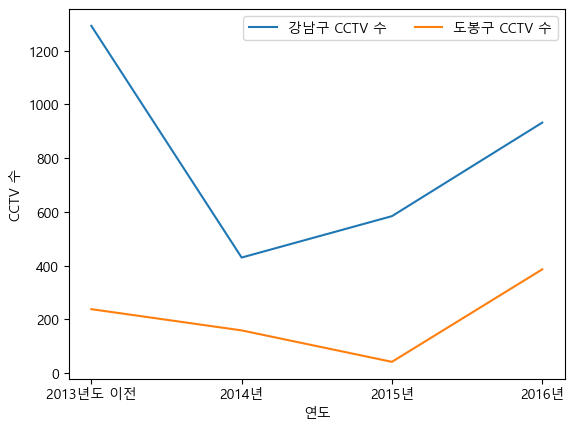

In [62]:
# --- CCTV 가장 많은 강남구와 가장 적은 도봉구의 연도별 증가 그래프 ---


# 그래프에 사용할 연도(컬럼) 리스트를 정의
years = ['2013년도 이전', '2014년', '2015년', '2016년']

# cctv_data 데이터프레임에서 첫 번째 행(강남구) 데이터 가져옴
gangnam = cctv_data.iloc[0]

# cctv_data 데이터프레임에서 마지막 행(도봉구) 데이터를 가져옴
dobong = cctv_data.iloc[-1]


# --- 그래프 그리기 ---

# 강남구 CCTV 수를 선 그래프로 그림
# x축: years / y축: 강남구의 해당 연도 CCTV 수
plt.plot(years, gangnam[years].values, label='강남구 CCTV 수')
# label='강남구 CCTV 수' : 범례에 표시될 이름

# 도봉구 CCTV 수를 선 그래프로 그림
plt.plot(years, dobong[years].values, label='도봉구 CCTV 수')
# label='도봉구 CCTV 수' : 범례에 표시될 이름

# x축 레이블 추가
plt.xlabel('연도')

# y축 레이블 추가
plt.ylabel('CCTV 수')


# --- 범례 설정 ---

# 첫 번째 범례 호출 → loc='best'로 최적 위치 자동 배치
plt.legend(loc='best')
# 이 호출은 곧 아래 호출에 의해 덮어써짐(중복 호출)

# 두 번째 범례 호출 (최종적으로 적용됨)
# loc='best' : 데이터와 겹치지 않는 최적 위치
# ncol=2     : 범례를 2개의 열로 정렬해 가로로 넓게 표시
plt.legend(loc='best', ncol=2)


# 완성된 그래프 화면에 표시
plt.show()

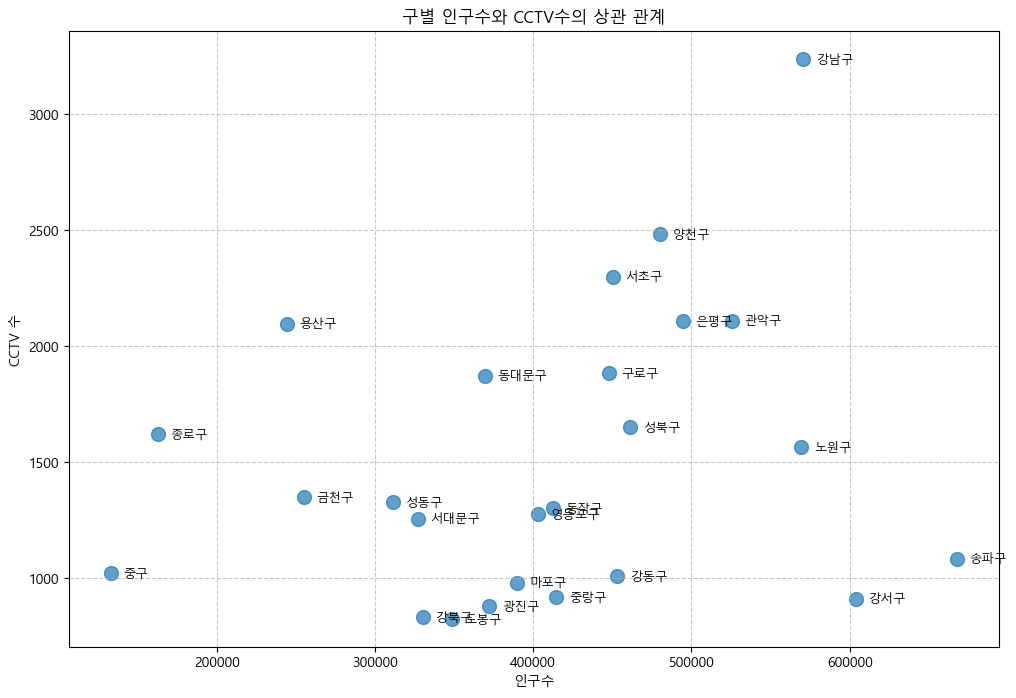

In [63]:
# ------------------------------------------------------------
#     인구수가 많으면 CCTV수가 많은가?
# ------------------------------------------------------------


# --- 구별 인구수와 CCTV수 비교 그래프 ---

# 필요한 3개 컬럼만 선택하여 새로운 DataFrame 생성
population_cctv_count_data = cctv_result_data[['구별', '인구수', 'CCTV수']]

# 그래프의 크기를 가로 10, 세로 8로 설정
plt.figure(figsize=(12, 8))

# 산점도(scatter plot) 생성
plt.scatter(
    population_cctv_count_data['인구수'],   # X축: 인구수
    population_cctv_count_data['CCTV수'],   # Y축: CCTV 수
    s=100,                                  # 점의 크기
    alpha=0.7                                # 점의 투명도
)


# 각 점에 구 이름(label) 표시하기
# iloc[i] 사용 → 인덱스 번호가 0이나 1이나 100(등등..)부터 시작해도 문제 없음
for i in range(len(population_cctv_count_data)):
    plt.text(
        # 텍스트가 표시될 X좌표 (인구수) + 6000: 점에서 약간 오른쪽으로 이동하여 겹침 방지
        population_cctv_count_data.iloc[i]['인구수'] + 8000,   
        # 텍스트가 표시될 Y좌표 (CCTV 수) -30: 점보다 약간 아래로 이동
        population_cctv_count_data.iloc[i]['CCTV수'] - 30,
        # 표시할 텍스트: 각 구의 이름
        population_cctv_count_data.iloc[i]['구별'],     
        fontsize=9,          # 글자 크기 설정
        ha='left',           # 수평 정렬: 왼쪽 기준
        va='bottom'          # 수직 정렬: 아래쪽 기준
    )



plt.xlabel('인구수')    # X축 레이블
plt.ylabel('CCTV 수')   # Y축 레이블
plt.title('구별 인구수와 CCTV수의 상관 관계')   # 그래프 제목
plt.grid(True, linestyle='--', alpha=0.7)  # 격자 표시 (점선, 투명도 0.7)

plt.show()


# ------------------------------------------------------------
#     아래 그래프를 확인해보면
#     인구수가 많은 강서구와 송파구는 강남구에 비해
#     CCTV 수가 매우 적다는 것을 알 수 있었음
# ------------------------------------------------------------

In [64]:
# ------------------------------------------------------------
#     그럼 타 구역과 비교했을 때,
#     예상 CCTV수는 어떻게 되어야하나?
# ------------------------------------------------------------

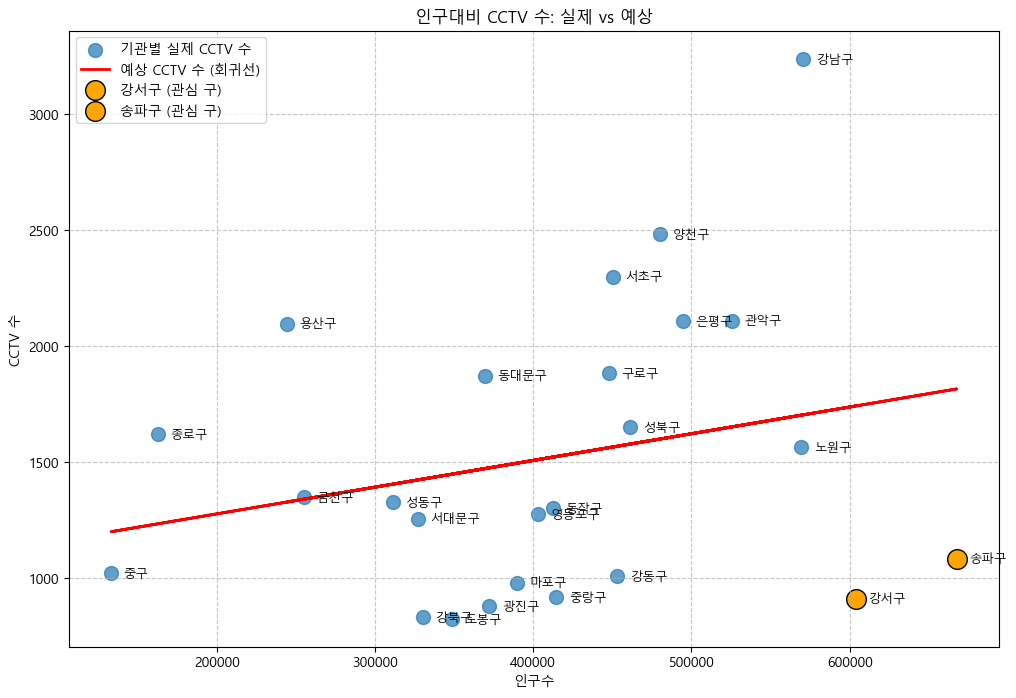

In [65]:
# --- 강서구와 송파구의 CCTV 수: 실제 vs 예상 ---

# 관심 구 리스트 설정
highlight_gu = ['강서구', '송파구']  
# 그래프에서 특별히 강조하고 싶은 구 이름들을 리스트로 지정

# 전체 데이터
x = cctv_result_data['인구수']   # X축: 각 구의 인구수
y = cctv_result_data['CCTV수']  # Y축: 각 구의 CCTV 수

# 선형 회귀선 계산 (예상 CCTV 수)
m, b = np.polyfit(x, y, 1)      # 1차 회귀선 계산: y = m*x + b
y_pred = m * x + b               # 각 구의 인구수에 대한 예상 CCTV 수

# 그래프 생성
plt.figure(figsize=(12, 8))      # 그래프 크기 설정 (가로 12인치, 세로 8인치)

# 전체 데이터 산점도
plt.scatter(x, y, s=100, alpha=0.7, label='기관별 실제 CCTV 수')
# s=100 : 점 크기, alpha=0.7 : 투명도, label : 범례 이름

# 회귀선
plt.plot(x, y_pred, color='red', linewidth=2, label='예상 CCTV 수 (회귀선)')  
# 인구수 대비 예상 CCTV 수를 빨간 선으로 표시
# linewidth=2 : 선 두께, label : 범례 이름


# 관심 구 강조
for gu in highlight_gu:
    # Boolean indexing으로 관심 구 행 선택
    target_index = cctv_result_data['구별'] == gu  
    
    # 관심 구 점 강조
    plt.scatter(
        cctv_result_data.loc[target_index, '인구수'],   # X좌표: 인구수
        cctv_result_data.loc[target_index, 'CCTV수'],   # Y좌표: CCTV 수
        s=200,                                         # 점 크기
        color='orange',                                # 점 색상
        edgecolor='black',                             # 점 테두리 색
        label=f'{gu} (관심 구)'                                  # 범례 표시
    )


# 구 이름 레이블 표시 (간격 조정으로 겹침 최소화)
for i in range(len(cctv_result_data)):
    plt.text(
        x[i] + 8000,        # X좌표: 점보다 약간 오른쪽으로 이동
        y[i] - 30,          # Y좌표: 점보다 약간 아래로 이동
        cctv_result_data.iloc[i]['구별'],   # 구 이름 가져오기
        fontsize=9,          # 글자 크기
        ha='left',           # 수평 정렬: 왼쪽
        va='bottom'          # 수직 정렬: 아래쪽
    )


plt.xlabel('인구수')  # X축 레이블
plt.ylabel('CCTV 수') # Y축 레이블
plt.title('인구대비 CCTV 수: 실제 vs 예상')  # 그래프 제목
plt.legend()           # 범례 표시
plt.grid(True, linestyle='--', alpha=0.7)  # 격자 표시 (점선, 투명도 0.7)

plt.show()


# ------------------------------------------------------------
#     빨간 선은 인구수 대비 평균적인 CCTV 수 추세를 보여줌
#     실제 CCTV 수(y)와 비교하면,
#     빨간 선 위에 있으면 예상보다 많음
#     빨간 선 아래에 있으면 예상보다 적음
# ------------------------------------------------------------
#     송파구와 강서구는 현재 CCTV 수는 인구 대비 평균보다 적은 상태
#     즉, 빨간 선 위로 올라가야 인구 대비 적정(예상) CCTV 수가 됨
# ------------------------------------------------------------

In [66]:
restaurant_data = pd.read_csv('./data/서울특별시_일반음식점.csv', encoding="cp949")
restaurant_data

C:\Users\User\AppData\Local\Temp\ipykernel_26720\2166965911.py:1: DtypeWarning: Columns (22,27,39,41,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  restaurant_data = pd.read_csv('./data/서울특별시_일반음식점.csv', encoding="cp949")


,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,일반음식점,07_24_04_P,3150000,3150000-101-2020-00448,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,35.19,NaN,NaN,NaN,NaN
1,2,일반음식점,07_24_04_P,3150000,3150000-101-2020-00449,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,50.37,NaN,NaN,NaN,NaN
2,3,일반음식점,07_24_04_P,3220000,3220000-101-2020-00851,20200803,NaN,1,영업/정상,1,...,0.0,NaN,0.0,0.0,N,13.65,NaN,NaN,NaN,NaN
3,4,일반음식점,07_24_04_P,3220000,3220000-101-2020-00853,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,Y,123.30,NaN,NaN,NaN,NaN
4,5,일반음식점,07_24_04_P,3220000,3220000-101-2020-00855,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,8.26,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472910,472911,일반음식점,07_24_04_P,3220000,3220000-101-2021-00112,20210202,NaN,3,폐업,2,...,0.0,NaN,0.0,0.0,N,18.00,NaN,NaN,NaN,NaN
472911,472912,일반음식점,07_24_04_P,3220000,3220000-101-2021-00113,20210202,NaN,3,폐업,2,...,0.0,NaN,0.0,0.0,N,13.86,NaN,NaN,NaN,NaN
472912,472913,일반음식점,07_24_04_P,3220000,3220000-101-2021-00114,20210202,NaN,3,폐업,2,...,0.0,NaN,0.0,0.0,N,14.15,NaN,NaN,NaN,NaN
472913,472914,일반음식점,07_24_04_P,3150000,3150000-101-2021-00072,20210203,NaN,3,폐업,2,...,0.0,NaN,0.0,0.0,N,75.60,NaN,NaN,NaN,NaN


In [ ]:
restaurant_data.columns     # 필요한 데이터만 추출하기 위해 어떤 컬럼이 있는지 확인

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총종업원수',
       '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액',
       '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지',
       'Unnamed: 47'],
      dtype='object')

In [68]:
# 필요한 데이터를 가지고 있는 컬럼을 추출하여 새 데이터프레임 생성
restaurant_selected_data = restaurant_data[['번호', '상세영업상태명', '소재지전체주소', '사업장명', '업태구분명']]
restaurant_selected_data

,번호,상세영업상태명,소재지전체주소,사업장명,업태구분명
0,1,영업,서울특별시 강서구 마곡동 757 두산더랜드파크 B동 207호,혼밥대왕 마곡점,한식
1,2,영업,서울특별시 강서구 화곡동 827-2 1층,꾸어가게생선구이화곡점,한식
2,3,영업,서울특별시 강남구 역삼동 707-34 한신인터밸리24빌딩,인생갈비탕,한식
3,4,영업,서울특별시 강남구 대치동 896-28,놀부 공유주방 선릉역,한식
4,5,영업,서울특별시 강남구 삼성동 159-7 현대백화점,온기정,일식
...,...,...,...,...,...
472910,472911,폐업,서울특별시 강남구 역삼동 799-18,샐러드랩 샐랩 춘하추동프로젝트,한식
472911,472912,폐업,서울특별시 강남구 역삼동 668-9 해석빌딩,노지푸드,한식
472912,472913,폐업,서울특별시 강남구 논현동 108 논현웰스톤,포베이키친밸리논현2호점 주방22호,기타
472913,472914,폐업,서울특별시 강서구 마곡동 798-6 류마타워Ⅱ 3층 310호,개성진 만두,한식


In [ ]:
# ------------------------------------------------------------
#     서울시 서대문구에서 치킨집이 가장 많은 동은?
# ------------------------------------------------------------


seodaemun_data = restaurant_selected_data[restaurant_selected_data['소재지전체주소'].str.contains('서대문구', na=False)]
# 문자열 안에 '서대문구'가 포함되어 있는지 확인
# na=False → NaN 값이 있으면 False로 처리

seodaemun_data

,번호,상세영업상태명,소재지전체주소,사업장명,업태구분명
27,28,영업,서울특별시 서대문구 창천동 30-20번지,이디야,분식
97,98,영업,서울특별시 서대문구 남가좌동 324-47번지,거북곱창,한식
118,119,영업,서울특별시 서대문구 대현동 60-60번지 지하1층,이화성,분식
119,120,영업,서울특별시 서대문구 북아현동 134-20,다모아,분식
120,121,영업,서울특별시 서대문구 충정로3가 464-0번지 지하 102호,충정타워지하식품,분식
...,...,...,...,...,...
472803,472804,폐업,서울특별시 서대문구 홍제동 90-19,카레먹고 튐,한식
472807,472808,폐업,"서울특별시 서대문구 창천동 13-1 1,2,3층",던킨도너츠 신촌명물점,기타
472842,472843,폐업,서울특별시 서대문구 합동 31-13,호토모토 충정로점,김밥(도시락)
472851,472852,폐업,서울특별시 서대문구 연희동 135-5 1층 4호,치킨사냥연희점,호프/통닭


In [70]:
seodaemun_data.shape[0]
# 데이터프레임의 행(row)과 열(column) 크기를 알려줌
# [0] → 행(row) 수만 선택

16354

In [71]:
seodaemun_data = seodaemun_data[seodaemun_data['상세영업상태명'].str.contains('영업', na=False)]
# 문자열 안에 '영업'이 포함되어 있는지 확인
# na=False → NaN 값이 있으면 False로 처리

seodaemun_data

,번호,상세영업상태명,소재지전체주소,사업장명,업태구분명
27,28,영업,서울특별시 서대문구 창천동 30-20번지,이디야,분식
97,98,영업,서울특별시 서대문구 남가좌동 324-47번지,거북곱창,한식
118,119,영업,서울특별시 서대문구 대현동 60-60번지 지하1층,이화성,분식
119,120,영업,서울특별시 서대문구 북아현동 134-20,다모아,분식
120,121,영업,서울특별시 서대문구 충정로3가 464-0번지 지하 102호,충정타워지하식품,분식
...,...,...,...,...,...
124093,124094,영업,서울특별시 서대문구 남가좌동 342-11,명품에프앤비 서대문점,한식
124094,124095,영업,서울특별시 서대문구 홍은동 190-24,밥,한식
124130,124131,영업,서울특별시 서대문구 남가좌동 382-9,BBQ 남가좌점,호프/통닭
124131,124132,영업,서울특별시 서대문구 연희동 100-16,베짜(VEZZA),경양식


In [72]:
seodaemun_data["업태구분명"].unique()   # 중복 없이 한 번만 나타나는 값들만 뽑아줌

array(['분식', '한식', '경양식', '기타', '통닭(치킨)', '일식', '호프/통닭',
       '외국음식전문점(인도,태국등)', '중국식', '정종/대포집/소주방', '횟집', '식육(숯불구이)', '까페',
       '냉면집', '전통찻집', '김밥(도시락)', '탕류(보신용)', '감성주점', '패스트푸드', '뷔페식',
       '라이브카페', '패밀리레스트랑', '출장조리'], dtype=object)

In [73]:
seodaemun_data = seodaemun_data[seodaemun_data['업태구분명'].str.contains('통닭', na=False)]
# 문자열 안에 '통닭'이 포함되어 있는지 확인
# na=False → NaN 값이 있으면 False로 처리

seodaemun_data

,번호,상세영업상태명,소재지전체주소,사업장명,업태구분명
178,179,영업,서울특별시 서대문구 창천동 33-25번지,구이마을(두번째),통닭(치킨)
698,699,영업,서울특별시 서대문구 홍제동 459 현대종합상가,또래오래(홍제점),호프/통닭
724,725,영업,서울특별시 서대문구 남가좌동 347-20번지,비에이치씨남가좌디엠씨점(BHC),호프/통닭
1200,1201,영업,서울특별시 서대문구 연희동 131-1번지 사러가쇼핑,동경 닭강정,호프/통닭
1405,1406,영업,서울특별시 서대문구 창천동 52-14,1996크리스터,호프/통닭
...,...,...,...,...,...
122500,122501,영업,서울특별시 서대문구 남가좌동 389 DMC에코자이,통닭마니아,호프/통닭
123490,123491,영업,서울특별시 서대문구 홍제동 307-5,소품이야기,호프/통닭
123548,123549,영업,서울특별시 서대문구 홍제동 96-5,신예원 닭강정,호프/통닭
123724,123725,영업,서울특별시 서대문구 북아현동 1011 신촌푸르지오,굽네치킨 북아현점,호프/통닭


In [ ]:
seodaemun_data["업태구분명"].unique()   # 중복 없이 한 번만 나타나는 값들만 뽑아줌

array(['통닭(치킨)', '호프/통닭'], dtype=object)

In [75]:
temp_data = seodaemun_data["소재지전체주소"].str.split(" ")     # 문자열을 공백 " " 기준으로 나누기
temp_data

178              [서울특별시, 서대문구, 창천동, 33-25번지]
698          [서울특별시, 서대문구, 홍제동, 459, 현대종합상가]
724            [서울특별시, 서대문구, 남가좌동, 347-20번지]
1200      [서울특별시, 서대문구, 연희동, 131-1번지, 사러가쇼핑]
1405               [서울특별시, 서대문구, 창천동, 52-14]
                         ...                
122500     [서울특별시, 서대문구, 남가좌동, 389, DMC에코자이]
123490             [서울특별시, 서대문구, 홍제동, 307-5]
123548              [서울특별시, 서대문구, 홍제동, 96-5]
123724     [서울특별시, 서대문구, 북아현동, 1011, 신촌푸르지오]
124130            [서울특별시, 서대문구, 남가좌동, 382-9]
Name: 소재지전체주소, Length: 400, dtype: object

In [76]:
# apply 사용해봅시다
# 서대문 데이터에 동이라는 새로운 컬럼을 만드는거 = 내용은 소재지전체주소에서 본인이 만든 함수로 동만 뽑아내서 그 값을 거기에 넣습니다.
# seodaemun_data['동'] = seodaemun_data['소재지전체주소'].apply("본인이 만든 함수")
# apply = “표의 각 칸/각 줄마다 내가 시키는 일을 한 번에 해주는 기능”
# 예시
def get_dong(address):
    # address = '서울특별시 서대문구 창천동 33-25번지' / address 는 이런 형태로 들어옵니다.
    # 이걸 리스트로 받아오니까 아까 했던 것처럼 split으로 나눈다음에 인덱스 위치가 2번째인걸 가져와서 return을 하면 되지 않을까? 라고 생각합니다.	
    # address.split(" ") = ["서울특별시", "서대문구", "창천동", "33-25번지"]
    address = address.split(" ")[2]
    return address
seodaemun_data["동"] = seodaemun_data['소재지전체주소'].apply(get_dong)
seodaemun_data

C:\Users\User\AppData\Local\Temp\ipykernel_26720\480220183.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seodaemun_data["동"] = seodaemun_data['소재지전체주소'].apply(get_dong)


,번호,상세영업상태명,소재지전체주소,사업장명,업태구분명,동
178,179,영업,서울특별시 서대문구 창천동 33-25번지,구이마을(두번째),통닭(치킨),창천동
698,699,영업,서울특별시 서대문구 홍제동 459 현대종합상가,또래오래(홍제점),호프/통닭,홍제동
724,725,영업,서울특별시 서대문구 남가좌동 347-20번지,비에이치씨남가좌디엠씨점(BHC),호프/통닭,남가좌동
1200,1201,영업,서울특별시 서대문구 연희동 131-1번지 사러가쇼핑,동경 닭강정,호프/통닭,연희동
1405,1406,영업,서울특별시 서대문구 창천동 52-14,1996크리스터,호프/통닭,창천동
...,...,...,...,...,...,...
122500,122501,영업,서울특별시 서대문구 남가좌동 389 DMC에코자이,통닭마니아,호프/통닭,남가좌동
123490,123491,영업,서울특별시 서대문구 홍제동 307-5,소품이야기,호프/통닭,홍제동
123548,123549,영업,서울특별시 서대문구 홍제동 96-5,신예원 닭강정,호프/통닭,홍제동
123724,123725,영업,서울특별시 서대문구 북아현동 1011 신촌푸르지오,굽네치킨 북아현점,호프/통닭,북아현동


In [77]:
seodaemun_data["동"].unique()   # 중복 없이 한 번만 나타나는 값들만 뽑아줌

array(['창천동', '홍제동', '남가좌동', '연희동', '북가좌동', '북아현동', '충정로2가', '냉천동', '옥천동',
       '홍은동', '충정로3가', '미근동', '대현동', '대신동', '영천동', '합동', '천연동'],
      dtype=object)

In [ ]:
dong_count = seodaemun_data['동'].value_counts()    # 각 동이 몇 번 나오는지 세어주는 함수
dong_count

동
창천동      91
홍제동      48
북가좌동     48
남가좌동     47
홍은동      43
연희동      41
북아현동     20
대현동      15
충정로2가    12
냉천동      10
충정로3가     9
미근동       6
옥천동       3
영천동       2
합동        2
천연동       2
대신동       1
Name: count, dtype: int64


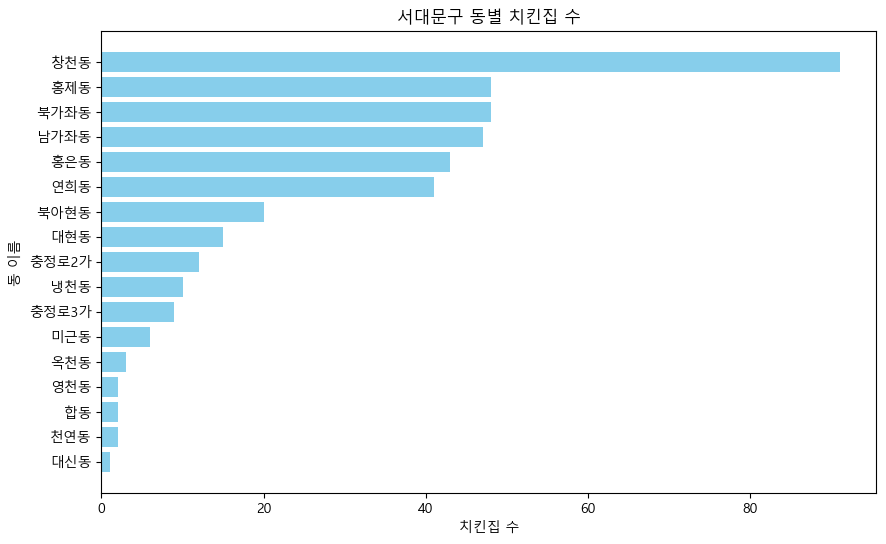

In [79]:

plt.figure(figsize=(10,6))  # 그래프의 크기 지정 (가로 10, 세로 6)
plt.barh(dong_count.index, dong_count.values, color='skyblue')  
# 수평 막대그래프 그리기
# dong_count.index → y축 레이블(동 이름)
# dong_count.values → x축 값(치킨집 수)
# color='skyblue' → 막대 색상을 하늘색으로 지정

plt.xlabel('치킨집 수')  # x축 제목
plt.ylabel('동 이름')     # y축 제목
plt.title('서대문구 동별 치킨집 수')  # 그래프 제목

plt.gca().invert_yaxis()  # y축 순서를 반전, 가장 큰 값이 위로 오도록
plt.show()  # 그래프 출력


# ------------------------------------------------------------
#     서울시 서대문구에서 치킨집이 가장 많은 동은?
#     창천동
# ------------------------------------------------------------

In [ ]:
# --- 서울시 구별 일반음식점 현황(갯수) ---

# '서울특별시'가 주소에 포함된 데이터만 선택하여 새로운 데이터프레임 생성
new_restaurant_df = restaurant_selected_data[
    restaurant_selected_data['소재지전체주소'].str.contains('서울특별시', na=False)
]
# .str.contains('서울특별시', na=False) 
# → 문자열 안에 '서울특별시'가 포함되어 있는지 확인
# → na=False : NaN 값이 있으면 False로 처리하여 제외

# 영업중인 음식점만 추출
new_restaurant_df = new_restaurant_df[new_restaurant_df['상세영업상태명'].str.contains('영업', na=False)]

# '구' 정보를 추출하는 함수 정의
def get_gu(gu):
    # 예시 gu 값: '서울특별시 서대문구 창천동 33-25번지'
    
    # 주소를 공백 기준으로 나누고, 앞에서 두 단어(서울특별시 + 구)를 가져옴
    gu = gu.split(" ")[0:2]
    
    # 리스트 안 요소들을 공백으로 이어서 문자열로 반환
    result = " ".join(gu)
    
    return result

# 각 행의 소재지전체주소에 get_gu 함수 적용하여 '서울특별시 구' 컬럼 생성
new_restaurant_df["서울특별시 구"] = new_restaurant_df['소재지전체주소'].apply(get_gu)

# 결과 확인
new_restaurant_df

,번호,상세영업상태명,소재지전체주소,사업장명,업태구분명,서울특별시 구
0,1,영업,서울특별시 강서구 마곡동 757 두산더랜드파크 B동 207호,혼밥대왕 마곡점,한식,서울특별시 강서구
1,2,영업,서울특별시 강서구 화곡동 827-2 1층,꾸어가게생선구이화곡점,한식,서울특별시 강서구
2,3,영업,서울특별시 강남구 역삼동 707-34 한신인터밸리24빌딩,인생갈비탕,한식,서울특별시 강남구
3,4,영업,서울특별시 강남구 대치동 896-28,놀부 공유주방 선릉역,한식,서울특별시 강남구
4,5,영업,서울특별시 강남구 삼성동 159-7 현대백화점,온기정,일식,서울특별시 강남구
...,...,...,...,...,...,...
124203,124204,영업,서울특별시 강북구 수유동 183-4 한영빌딩,청년치킨 수유점,호프/통닭,서울특별시 강북구
124204,124205,영업,서울특별시 강북구 미아동 833-19 삼서빌,포마살롱,기타,서울특별시 강북구
124205,124206,영업,서울특별시 성북구 길음동 1288 래미안길음센터피스 지하2층 근린생활시설-1동 1119호,우쿠야,일식,서울특별시 성북구
124206,124207,영업,서울특별시 성북구 종암동 16-17,한일전,한식,서울특별시 성북구


In [131]:
result_count = new_restaurant_df['서울특별시 구'].value_counts()    # 각 구가 몇 번 나오는지 세어주는 함수
result_count

서울특별시 구
서울특별시 강남구     12253
서울특별시 마포구      7891
서울특별시 송파구      7196
서울특별시 종로구      7049
서울특별시 영등포구     6811
서울특별시 중구       6326
서울특별시 강서구      6068
서울특별시 서초구      5829
서울특별시 관악구      4822
서울특별시 용산구      4786
서울특별시 광진구      4323
서울특별시 동대문구     4246
서울특별시 강동구      4155
서울특별시 구로구      4126
서울특별시 성북구      3951
서울특별시 은평구      3839
서울특별시 서대문구     3819
서울특별시 성동구      3798
서울특별시 중랑구      3792
서울특별시 노원구      3676
서울특별시 강북구      3508
서울특별시 양천구      3218
서울특별시 동작구      3188
서울특별시 금천구      3071
서울특별시 도봉구      2381
Name: count, dtype: int64

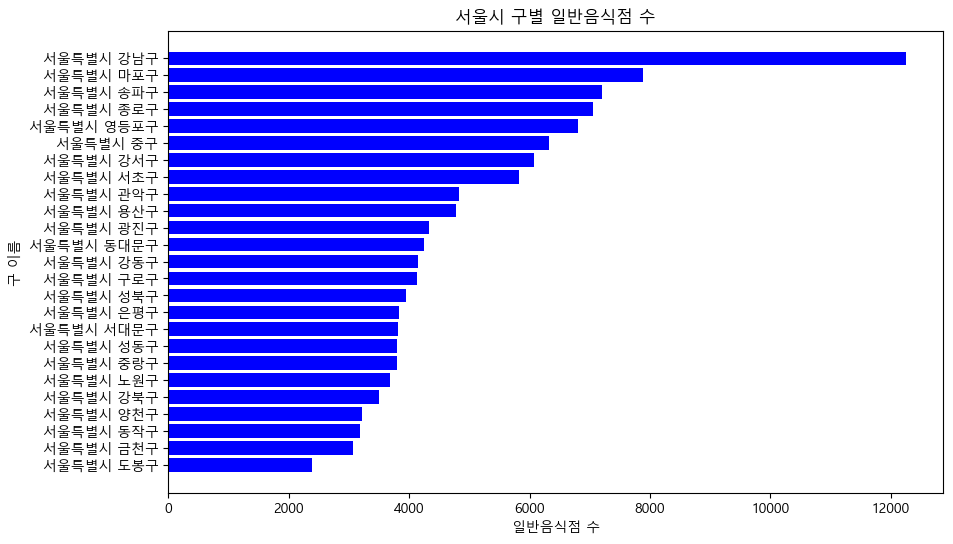

In [132]:
plt.figure(figsize=(10,6))  # 그래프의 크기 지정 (가로 10, 세로 6)
plt.barh(result_count.index, result_count.values, color='blue')  
# 수평 막대그래프 그리기
# result_count.index → y축 레이블(동 이름)
# result_count.values → x축 값(치킨집 수)
# color='blue' → 막대 색상을 하늘색으로 지정

plt.xlabel('일반음식점 수')  # x축 제목
plt.ylabel('구 이름')     # y축 제목
plt.title('서울시 구별 일반음식점 수')  # 그래프 제목

plt.gca().invert_yaxis()  # y축 순서를 반전, 가장 큰 값이 위로 오도록
plt.show()  # 그래프 출력


# ------------------------------------------------------------
#     서울시에서 일반음식점이 가장 많은 구는?
#     강남구
# ------------------------------------------------------------

In [139]:
# ------------------------------------------------------------
#     강남구에서 어떤 종류의 음식점이 가장 많은가?
# ------------------------------------------------------------

gangnam_restaurant_df = restaurant_selected_data[restaurant_selected_data['소재지전체주소'].str.contains('강남구', na=False)]
# 문자열 안에 '강남구'가 포함되어 있는지 확인

gangnam_restaurant_df

,번호,상세영업상태명,소재지전체주소,사업장명,업태구분명
2,3,영업,서울특별시 강남구 역삼동 707-34 한신인터밸리24빌딩,인생갈비탕,한식
3,4,영업,서울특별시 강남구 대치동 896-28,놀부 공유주방 선릉역,한식
4,5,영업,서울특별시 강남구 삼성동 159-7 현대백화점,온기정,일식
5,6,영업,서울특별시 강남구 청담동 118-7 플럭서스 빌딩,명월당,한식
12,13,영업,서울특별시 강남구 역삼동 651-12,쌘떡볶이,분식
...,...,...,...,...,...
472902,472903,폐업,서울특별시 강남구 역삼동 836-69 MARK TOWER,고고숯불닭갈비&삼겹살,한식
472903,472904,폐업,서울특별시 강남구 논현동 225-6 논현 아이파크,넌술만준비해,한식
472910,472911,폐업,서울특별시 강남구 역삼동 799-18,샐러드랩 샐랩 춘하추동프로젝트,한식
472911,472912,폐업,서울특별시 강남구 역삼동 668-9 해석빌딩,노지푸드,한식


In [140]:
gangnam_restaurant_df["업태구분명"].unique()   # 중복 없이 한 번만 나타나는 값들만 뽑아줌

array(['한식', '일식', '분식', '식육(숯불구이)', '경양식', '출장조리', '기타', '패밀리레스트랑',
       '외국음식전문점(인도,태국등)', '호프/통닭', '중국식', '감성주점', '김밥(도시락)', '라이브카페',
       '키즈카페', '뷔페식', '정종/대포집/소주방', '냉면집', '횟집', '패스트푸드', '통닭(치킨)', '까페',
       '복어취급', '전통찻집', '탕류(보신용)', '이동조리', nan], dtype=object)

In [141]:
gangnam_count = gangnam_restaurant_df['업태구분명'].value_counts()    # 각 동이 몇 번 나오는지 세어주는 함수
gangnam_count

업태구분명
한식                 17131
경양식                11282
분식                  5274
일식                  2633
기타                  2600
중국식                 1177
패스트푸드                889
호프/통닭                593
통닭(치킨)               574
까페                   389
정종/대포집/소주방           329
김밥(도시락)              259
외국음식전문점(인도,태국등)      245
뷔페식                  172
전통찻집                 138
감성주점                  86
식육(숯불구이)              73
출장조리                  55
탕류(보신용)               54
라이브카페                 33
패밀리레스트랑               32
횟집                    23
이동조리                  11
키즈카페                   6
복어취급                   6
냉면집                    4
Name: count, dtype: int64

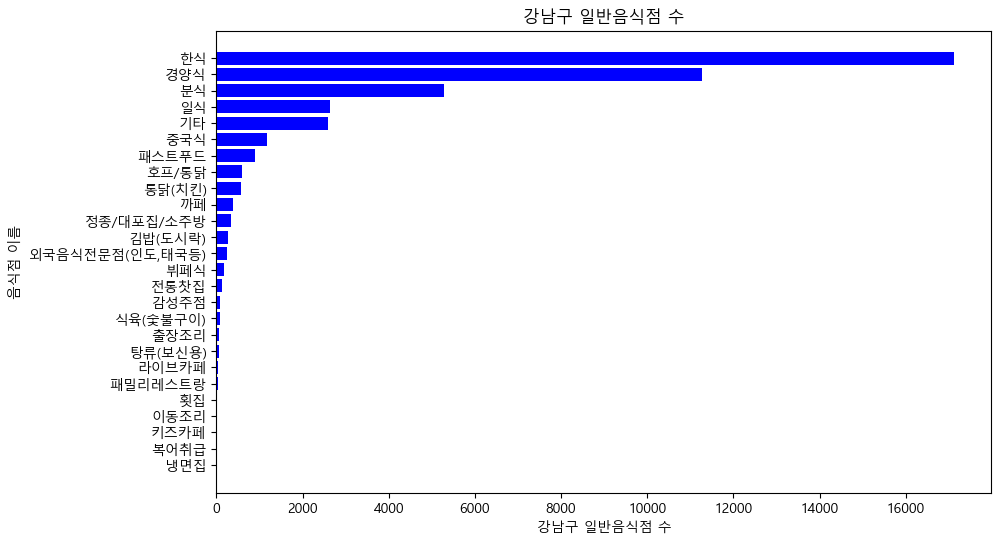

In [142]:
plt.figure(figsize=(10,6))  # 그래프의 크기 지정 (가로 10, 세로 6)
plt.barh(gangnam_count.index, gangnam_count.values, color='blue')  
# 수평 막대그래프 그리기
# gangnam_count.index → y축 레이블(동 이름)
# gangnam_count.values → x축 값(치킨집 수)
# color='blue' → 막대 색상을 하늘색으로 지정

plt.xlabel('강남구 일반음식점 수')  # x축 제목
plt.ylabel('음식점 이름')     # y축 제목
plt.title('강남구 일반음식점 수')  # 그래프 제목

plt.gca().invert_yaxis()  # y축 순서를 반전, 가장 큰 값이 위로 오도록
plt.show()  # 그래프 출력


# ------------------------------------------------------------
#     강남구에서 어떤 종류의 음식점이 가장 많은가?
#     한식
# ------------------------------------------------------------

In [148]:
# ------------------------------------------------------------
#     서울시 강남구에서 한식집이 가장 많은 동은?
# ------------------------------------------------------------

gangnam_korean_food_df = restaurant_selected_data[
    restaurant_selected_data['소재지전체주소'].str.contains('강남구', na=False) &  # 강남구
    restaurant_selected_data['상세영업상태명'].str.contains('영업', na=False) &  # 영업 중
    restaurant_selected_data['업태구분명'].str.contains('한식', na=False)       # 한식
]
# 문자열 안에 '강남구', '영업', '한식'이 포함되어 있는지 확인

gangnam_korean_food_df

,번호,상세영업상태명,소재지전체주소,사업장명,업태구분명
2,3,영업,서울특별시 강남구 역삼동 707-34 한신인터밸리24빌딩,인생갈비탕,한식
3,4,영업,서울특별시 강남구 대치동 896-28,놀부 공유주방 선릉역,한식
5,6,영업,서울특별시 강남구 청담동 118-7 플럭서스 빌딩,명월당,한식
15,16,영업,서울특별시 강남구 논현동 111-13 노벨빌딩,보승회관 강남구청역점,한식
450,451,영업,"서울특별시 강남구 역삼동 837-17번지 삼성애니텔 지상1층 104, 105, 106호",전주희약선가마솥국밥,한식
...,...,...,...,...,...
124100,124101,영업,서울특별시 강남구 수서동 713 수서현대벤쳐빌,신달자도시락마트,한식
124101,124102,영업,서울특별시 강남구 역삼동 789-13 라비빌딩,온미반&마키아티,한식
124123,124124,영업,서울특별시 강남구 논현동 221-7 한양수자인 어반게이트,한끼 아뜰리에,한식
124124,124125,영업,서울특별시 강남구 역삼동 647-3,비비(BB)빠,한식


In [149]:
gangnam_korean_food_df["업태구분명"].unique()

array(['한식'], dtype=object)

In [150]:
def get_gangnam_dong(address):
    address = address.split(" ")[2]
    return address
gangnam_korean_food_df["동"] = gangnam_korean_food_df['소재지전체주소'].apply(get_gangnam_dong)
gangnam_korean_food_df

C:\Users\User\AppData\Local\Temp\ipykernel_26720\3405367676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangnam_korean_food_df["동"] = gangnam_korean_food_df['소재지전체주소'].apply(get_gangnam_dong)


,번호,상세영업상태명,소재지전체주소,사업장명,업태구분명,동
2,3,영업,서울특별시 강남구 역삼동 707-34 한신인터밸리24빌딩,인생갈비탕,한식,역삼동
3,4,영업,서울특별시 강남구 대치동 896-28,놀부 공유주방 선릉역,한식,대치동
5,6,영업,서울특별시 강남구 청담동 118-7 플럭서스 빌딩,명월당,한식,청담동
15,16,영업,서울특별시 강남구 논현동 111-13 노벨빌딩,보승회관 강남구청역점,한식,논현동
450,451,영업,"서울특별시 강남구 역삼동 837-17번지 삼성애니텔 지상1층 104, 105, 106호",전주희약선가마솥국밥,한식,역삼동
...,...,...,...,...,...,...
124100,124101,영업,서울특별시 강남구 수서동 713 수서현대벤쳐빌,신달자도시락마트,한식,수서동
124101,124102,영업,서울특별시 강남구 역삼동 789-13 라비빌딩,온미반&마키아티,한식,역삼동
124123,124124,영업,서울특별시 강남구 논현동 221-7 한양수자인 어반게이트,한끼 아뜰리에,한식,논현동
124124,124125,영업,서울특별시 강남구 역삼동 647-3,비비(BB)빠,한식,역삼동


In [152]:
gangnam_korean_food_df["동"].unique()   # 중복 없이 한 번만 나타나는 값들만 뽑아줌

array(['역삼동', '대치동', '청담동', '논현동', '삼성동', '신사동', '도곡동', '개포동', '일원동',
       '압구정동', '수서동', '자곡동', '율현동', '세곡동'], dtype=object)

In [153]:
gangnam_korean_food_count = gangnam_korean_food_df['동'].value_counts()    # 각 동이 몇 번 나오는지 세어주는 함수
gangnam_korean_food_count

동
역삼동     1348
논현동      849
대치동      599
신사동      567
삼성동      480
청담동      267
도곡동      212
개포동      203
일원동      110
수서동      107
세곡동       40
자곡동       37
압구정동      32
율현동       16
Name: count, dtype: int64

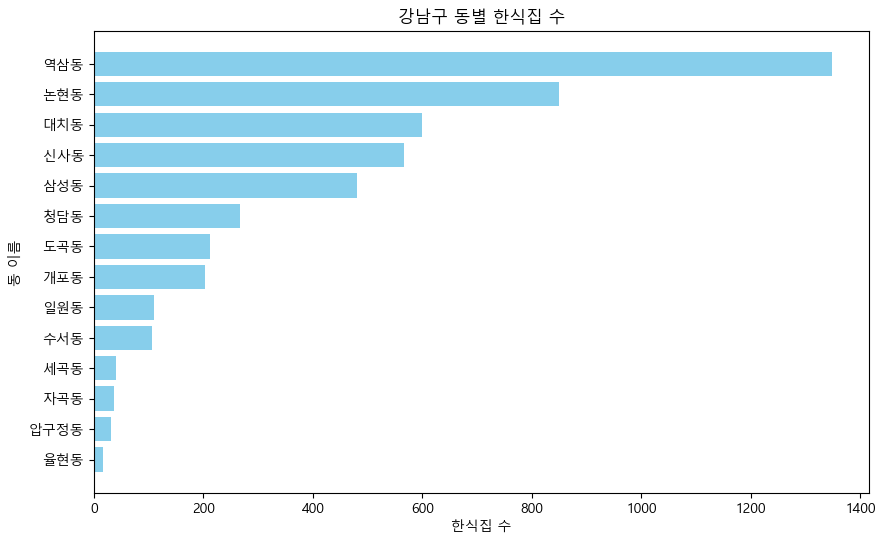

In [155]:
plt.figure(figsize=(10,6))  # 그래프의 크기 지정 (가로 10, 세로 6)
plt.barh(gangnam_korean_food_count.index, gangnam_korean_food_count.values, color='skyblue')  
# 수평 막대그래프 그리기
# gangnam_korean_food_count.index → y축 레이블(동 이름)
# gangnam_korean_food_count.values → x축 값(치킨집 수)
# color='skyblue' → 막대 색상을 하늘색으로 지정

plt.xlabel('한식집 수')  # x축 제목
plt.ylabel('동 이름')     # y축 제목
plt.title('강남구 동별 한식집 수')  # 그래프 제목

plt.gca().invert_yaxis()  # y축 순서를 반전, 가장 큰 값이 위로 오도록
plt.show()  # 그래프 출력


# ------------------------------------------------------------
#     서울시 강남구에서 한식집이 가장 많은 동은?
#     역삼동
# ------------------------------------------------------------

In [126]:
# ------------------------------------------------------------
#     서울시에서 치킨집이 가장 많은 구는?
# ------------------------------------------------------------


chi_df = new_restaurant_df[new_restaurant_df['업태구분명'].str.contains('통닭', na=False)]
# 문자열 안에 '통닭'이 포함되어 있는지 확인
# na=False → NaN 값이 있으면 False로 처리
chi_df

,번호,상세영업상태명,소재지전체주소,사업장명,업태구분명,서울특별시 구
30,31,영업,서울특별시 은평구 갈현동 400-9번지 (지하1층),청,호프/통닭,서울특별시 은평구
43,44,영업,서울특별시 영등포구 양평동3가 101번지 현대아파트 상가내 1층 102호,비에이치씨 양평현대점,호프/통닭,서울특별시 영등포구
44,45,영업,서울특별시 중구 필동2가 32-24번지 1층,짝퉁,호프/통닭,서울특별시 중구
66,67,영업,서울특별시 종로구 당주동 128-17번지 (지상1층),써브웨이 (광화문점),호프/통닭,서울특별시 종로구
67,68,영업,서울특별시 서초구 우면동 59번지 105호,교촌,호프/통닭,서울특별시 서초구
...,...,...,...,...,...,...
124130,124131,영업,서울특별시 서대문구 남가좌동 382-9,BBQ 남가좌점,호프/통닭,서울특별시 서대문구
124151,124152,영업,서울특별시 구로구 오류동 47-1 삼익쇼핑,치킨대통령,호프/통닭,서울특별시 구로구
124171,124172,영업,서울특별시 관악구 신림동 246-30,플레이걸,호프/통닭,서울특별시 관악구
124193,124194,영업,서울특별시 중랑구 상봉동 268-36 1층,지코바 상봉1호점,호프/통닭,서울특별시 중랑구


In [127]:
chi_df["업태구분명"].unique()

array(['호프/통닭', '통닭(치킨)'], dtype=object)

In [128]:
chi_df_count = chi_df['서울특별시 구'].value_counts()    # 각 구가 몇 번 나오는지 세어주는 함수
chi_df_count

서울특별시 구
서울특별시 구로구     783
서울특별시 마포구     743
서울특별시 영등포구    729
서울특별시 관악구     693
서울특별시 중랑구     663
서울특별시 광진구     650
서울특별시 강서구     625
서울특별시 강동구     605
서울특별시 노원구     586
서울특별시 동대문구    570
서울특별시 은평구     554
서울특별시 송파구     536
서울특별시 양천구     513
서울특별시 성북구     500
서울특별시 강북구     495
서울특별시 금천구     479
서울특별시 서초구     472
서울특별시 강남구     435
서울특별시 도봉구     431
서울특별시 동작구     409
서울특별시 서대문구    400
서울특별시 성동구     355
서울특별시 중구      329
서울특별시 종로구     293
서울특별시 용산구     255
Name: count, dtype: int64

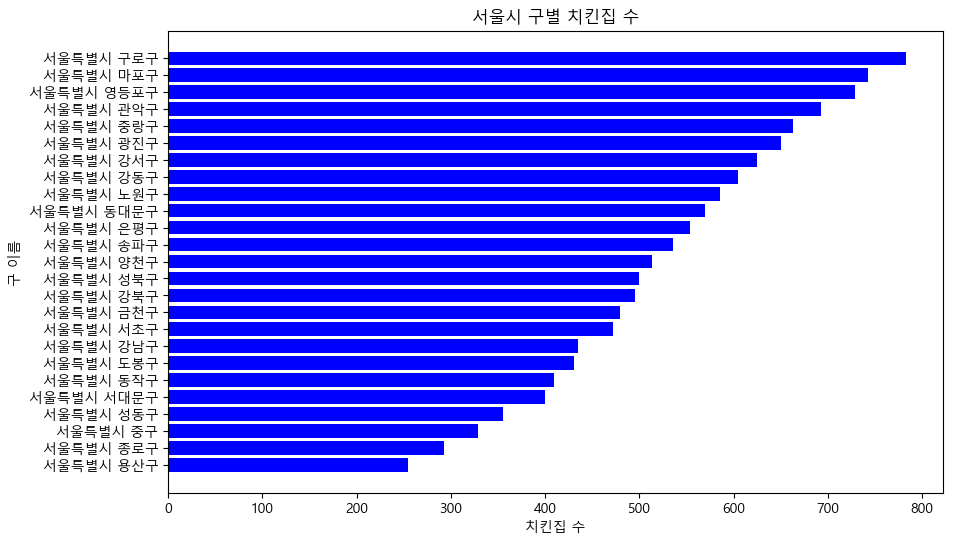

In [129]:
# --- 서울시 구별 치킨집 현황(갯수) ---

plt.figure(figsize=(10,6))  # 그래프의 크기 지정 (가로 10, 세로 6)
plt.barh(chi_df_count.index, chi_df_count.values, color='blue')  
# 수평 막대그래프 그리기
# chi_df_count.index → y축 레이블(동 이름)
# chi_df_count.values → x축 값(치킨집 수)
# color='blue' → 막대 색상을 하늘색으로 지정

plt.xlabel('치킨집 수')  # x축 제목
plt.ylabel('구 이름')     # y축 제목
plt.title('서울시 구별 치킨집 수')  # 그래프 제목

plt.gca().invert_yaxis()  # y축 순서를 반전, 가장 큰 값이 위로 오도록
plt.show()  # 그래프 출력


# ------------------------------------------------------------
#     서울시에서 치킨집이 가장 많은 구는?
#     구로구
# ------------------------------------------------------------